In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
df= pd.read_csv(r'C:\Users\excel\OneDrive\Desktop\SMSSpamCollection',sep='\t',header=0,names=['label','msg'])

In [17]:
df.head()

,label,msg
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [18]:
df['len']= df['msg'].apply(len)

In [19]:
df

,label,msg,len
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,160
5567,ham,Will ü b going to esplanade fr home?,36
5568,ham,"Pity, * was in mood for that. So...any other s...",57
5569,ham,The guy did some bitching but I acted like i'd...,125


<Axes: >

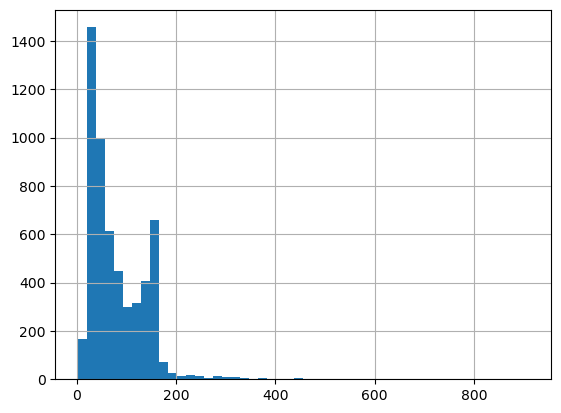

In [20]:
df['len'].hist(bins=50)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

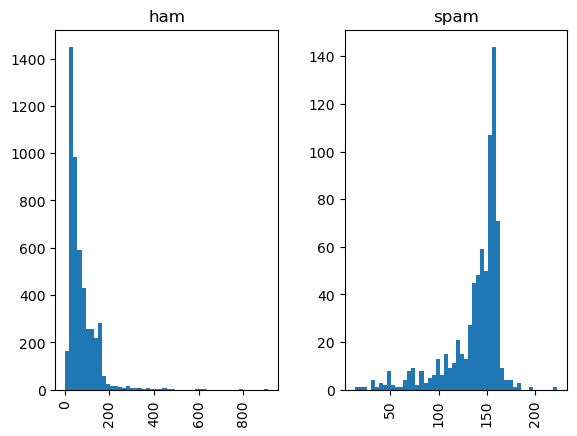

In [21]:
df.hist(bins=50,by='label',column='len')

In [22]:
df['len'].describe()

count    5571.000000
mean       80.484473
std        59.946894
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len, dtype: float64

In [24]:
df[df['len']==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## EDA Process

In [25]:
# 1. Punctuation Removal

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
str1= 'data science **&*|||??'

In [29]:
str1

'data science **&*|||??'

In [30]:
no_punc= [ x for x in str1 if x not in string.punctuation]

In [31]:
no_punc

['d', 'a', 't', 'a', ' ', 's', 'c', 'i', 'e', 'n', 'c', 'e', ' ']

In [32]:
''.join(no_punc)

'data science '

In [33]:
from nltk.corpus import stopwords

In [34]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
def cleanwords(title):
    no_punc= [ x for x in title if x not in string.punctuation]
    no_punc= ''.join(no_punc)
    return [ x for x in no_punc.split() if x.lower() not in stopwords.words('english')]

In [40]:
cleanwords('data science^^**& is the best course"""')

['data', 'science', 'best', 'course']

In [43]:
stem= PorterStemmer()
lem= WordNetLemmatizer()

In [44]:
sentence= 'this is the python class started in the month of august and is looking better'

In [52]:
word= word_tokenize(sentence)
for i in word:
    print('{0:20}-{1:20}-{2:20}'.format(i,stem.stem(i),lem.lemmatize(i,pos='v')))

this                -thi                 -this                
is                  -is                  -be                  
the                 -the                 -the                 
python              -python              -python              
class               -class               -class               
started             -start               -start               
in                  -in                  -in                  
the                 -the                 -the                 
month               -month               -month               
of                  -of                  -of                  
august              -august              -august              
and                 -and                 -and                 
is                  -is                  -be                  
looking             -look                -look                
better              -better              -better              


In [48]:
word

['this',
 'is',
 'the',
 'python',
 'class',
 'started',
 'in',
 'the',
 'month',
 'of',
 'august',
 'and',
 'is',
 'looking',
 'better']

In [53]:
corpus=['this is the data science class with SL',
       'AI is the next class',
       'and this is third class',
       'and this is fourth class']

In [61]:
count= CountVectorizer(ngram_range=(1,1),analyzer=cleanwords)

In [62]:
x=count.fit_transform(corpus)

In [63]:
print(count.get_feature_names_out())

['AI' 'SL' 'class' 'data' 'fourth' 'next' 'science' 'third']


In [64]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [65]:
a= CountVectorizer(ngram_range=(1,1),analyzer=cleanwords)

In [66]:
b=a.fit_transform(df['msg'])

In [69]:
np.unique(b.toarray())

array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 14, 18], dtype=int64)

In [70]:
b

<5571x11422 sparse matrix of type '<class 'numpy.int64'>'
	with 50532 stored elements in Compressed Sparse Row format>

In [71]:
5571*11422

63631962

In [72]:
tfid= TfidfTransformer()

In [74]:
c=tfid.fit_transform(b)

In [75]:
c

<5571x11422 sparse matrix of type '<class 'numpy.float64'>'
	with 50532 stored elements in Compressed Sparse Row format>

In [77]:
pd.DataFrame(c)

,0
0,"(0, 11069)\t0.4006149091288251\n (0, 10695)..."
1,"(0, 11120)\t0.19104376713756943\n (0, 11081..."
2,"(0, 9551)\t0.5385616356475857\n (0, 7184)\t..."
3,"(0, 10796)\t0.40190271440345665\n (0, 10447..."
4,"(0, 11368)\t0.2156244576347671\n (0, 11147)..."
...,...
5566,"(0, 11405)\t0.31561990813161644\n (0, 10695..."
5567,"(0, 11415)\t0.3432148803695385\n (0, 7157)\..."
5568,"(0, 10196)\t0.5204675637906249\n (0, 8249)\..."
5569,"(0, 11003)\t0.20434342415423318\n (0, 10784..."


In [78]:
rand_clf= RandomForestClassifier()

In [79]:
rand_clf.fit(c,df['label'])

RandomForestClassifier()

In [80]:
pred= rand_clf.predict(c)

In [81]:
accuracy_score(df['label'],pred)

1.0

In [82]:
from sklearn.pipeline import Pipeline

In [83]:
x_train,x_test,y_train,y_test= train_test_split(df['msg'],df['label'],train_size=0.75)

In [84]:
pipe= Pipeline([('count_vec',CountVectorizer(ngram_range=(1,1),analyzer=cleanwords)),('tfid_tr',TfidfTransformer()),('rand_c',RandomForestClassifier())])

In [85]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('count_vec',
                 CountVectorizer(analyzer=<function cleanwords at 0x000001E1A41C4AF0>)),
                ('tfid_tr', TfidfTransformer()),
                ('rand_c', RandomForestClassifier())])

In [86]:
pred= pipe.predict(x_test)

In [87]:
accuracy_score(y_test,pred)

0.9748743718592965